<a href="https://colab.research.google.com/github/Cvelsen22/Carmelo-Velez---Data-Analysis-Portfolio/blob/main/Modeling_Car_Insurance_Claim_Outcomes_Logistic_Reg_vs_Knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to the problem
Insurance companies invest a lot of [time and money](https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf) into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

Knowing all of this, I'm building a model to predict whether a customer will make a claim on their insurance during the policy period. I use Logistic Regression and Knn, identifying the single feature that results in the best performing model, as measured by accuracy.

## The dataset

| Column | Description |
|--------|-------------|
| `id`   | Unique client identifier |
| `age`  | Client's age: <br> <ul><li>`0`: 16-15</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code |
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client |
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |

In [ ]:
# Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Data Preparation

In [ ]:
# Read in dataset
cars = pd.read_csv("car_insurance.csv")
cars.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [ ]:
# Filter the DataFrame for object columns
non_numeric = cars.select_dtypes("object")

# Loop through columns
for col in non_numeric.columns:

  # Print the number of unique values
  print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())

Number of unique values in driving_experience column:  4
Number of unique values in education column:  3
Number of unique values in income column:  4
Number of unique values in vehicle_year column:  2
Number of unique values in vehicle_type column:  2


In [ ]:
def factorize_columns(df, column, new_column):
  df[new_column] = pd.factorize(df[column])[0]
  return df[new_column].value_counts()

In [ ]:
def encode_column(ordered_categories, df, column, new_column_name):
  df[new_column_name] = pd.Categorical(df[column], categories = ordered_categories, ordered=True).codes
  return df[new_column_name].value_counts()

In [ ]:
cars['driving_experience'].value_counts()

0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: driving_experience, dtype: int64

In [ ]:
encode_column(['0-9y', '10-19y', '20-29y', '30y+'], cars, 'driving_experience', 'encoded_driving_experience')

0    3530
1    3299
2    2119
3    1052
Name: encoded_driving_experience, dtype: int64

In [ ]:
cars['education'].value_counts()

high school    4157
university     3928
none           1915
Name: education, dtype: int64

In [ ]:
encode_column(['none','high school','university'], cars, 'education', 'encoded_education')

1    4157
2    3928
0    1915
Name: encoded_education, dtype: int64

In [ ]:
cars['income'].value_counts()

upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: income, dtype: int64

In [ ]:
encode_column(['poverty','working class','middle class','upper class'], cars, 'income', 'encoded_income')

3    4336
2    2138
0    1814
1    1712
Name: encoded_income, dtype: int64

In [ ]:
cars['vehicle_year'].value_counts()

before 2015    6967
after 2015     3033
Name: vehicle_year, dtype: int64

In [ ]:
factorize_columns(cars, 'vehicle_year', 'factorized_vehicle_year')

1    6967
0    3033
Name: factorized_vehicle_year, dtype: int64

In [ ]:
cars['vehicle_type'].value_counts()

sedan         9523
sports car     477
Name: vehicle_type, dtype: int64

In [ ]:
factorize_columns(cars, 'vehicle_type', 'factorized_vehicle_type')

0    9523
1     477
Name: factorized_vehicle_type, dtype: int64

In [ ]:
cars['discretized_outcome'] = cars['outcome'].astype(int)
cars['discretized_vehicle_ownership'] = cars['vehicle_ownership'].astype(int)
cars['discretized_married'] = cars['married'].astype(int)
cars['discretized_children'] = cars['children'].astype(int)

In [ ]:
preprocessed_data = cars.drop(['id', 'postal_code', 'driving_experience', 'education', 'income', 'vehicle_year', 'vehicle_type', 'outcome', 'vehicle_ownership', 'married', 'children'], axis = 1)

In [ ]:
preprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            10000 non-null  int64  
 1   gender                         10000 non-null  int64  
 2   credit_score                   9018 non-null   float64
 3   annual_mileage                 9043 non-null   float64
 4   speeding_violations            10000 non-null  int64  
 5   duis                           10000 non-null  int64  
 6   past_accidents                 10000 non-null  int64  
 7   encoded_driving_experience     10000 non-null  int8   
 8   encoded_education              10000 non-null  int8   
 9   encoded_income                 10000 non-null  int8   
 10  factorized_vehicle_year        10000 non-null  int64  
 11  factorized_vehicle_type        10000 non-null  int64  
 12  discretized_outcome            10000 non-null  

In [ ]:
X = preprocessed_data.drop("discretized_outcome", axis=1).values
y = preprocessed_data["discretized_outcome"].values

In [ ]:
X.shape

(10000, 15)

In [ ]:
y.shape

(10000,)

In [ ]:
# Reshape X
y = y.reshape(-1,1)
y.shape

(10000, 1)

In [ ]:
#Imputation
imp_mean = SimpleImputer(strategy='mean')
X_imputed_data = imp_mean.fit_transform(X)
y_imputed_data = imp_mean.fit_transform(y)

In [ ]:
#Standardization/Scaling
#scaler = StandardScaler()
#X_scaled_data = scaler.fit_transform(X_imputed_data)
#y_scaled_data = scaler.fit_transform(y_imputed_data)

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed_data, y_imputed_data, test_size=0.2, random_state=42)

# k-Nearest Neighbors

In [ ]:
# Create the model
knn = KNeighborsClassifier(n_neighbors=18)

In [ ]:
# Fit the classifier to the training data
knn.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=18)

In [ ]:
# Print the accuracy
print(knn.score(X_test, y_test))

0.801


In [ ]:
# Create neighbors
neighbors = np.arange(1, 21)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:

	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)

	# Fit the model
	knn.fit(X_train, y_train)

	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print('neighbors:', neighbors, '\n', 'train_accuracies:', train_accuracies, '\n', 'test_accuracies:', test_accuracies)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

neighbors: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
 train_accuracies: {1: 0.999125, 2: 0.881625, 3: 0.883125, 4: 0.85875, 5: 0.859, 6: 0.84625, 7: 0.844625, 8: 0.841, 9: 0.84125, 10: 0.838, 11: 0.835875, 12: 0.835, 13: 0.835625, 14: 0.830625, 15: 0.83025, 16: 0.827625, 17: 0.825, 18: 0.82675, 19: 0.825125, 20: 0.82475} 
 test_accuracies: {1: 0.765, 2: 0.776, 3: 0.782, 4: 0.7945, 5: 0.7855, 6: 0.796, 7: 0.794, 8: 0.7985, 9: 0.793, 10: 0.8015, 11: 0.8015, 12: 0.8045, 13: 0.803, 14: 0.8035, 15: 0.8025, 16: 0.8045, 17: 0.802, 18: 0.801, 19: 0.7995, 20: 0.8025}


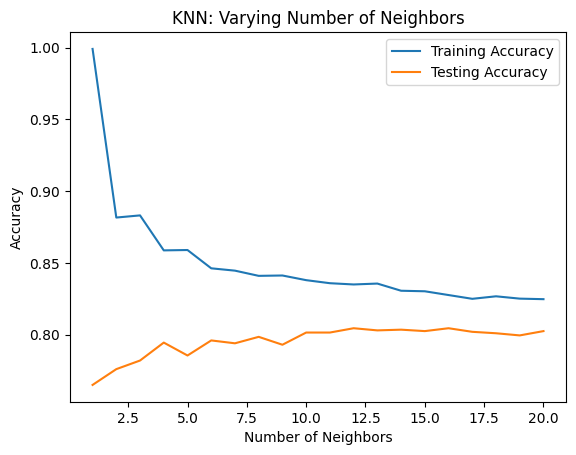

In [ ]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

# Cross-validation

In [ ]:
# Create a KFold object
kf = KFold(n_splits=10, shuffle=True, random_state=5)

In [ ]:
# Compute 10-fold cross-validation scores
cv_scores = cross_val_score(knn, X_imputed_data, y_imputed_data, cv=kf)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

In [ ]:
# Print scores
print("scores:",cv_scores)

scores: [0.837 0.804 0.8   0.793 0.805 0.796 0.795 0.826 0.804 0.813]


# Hyperparameter tuning with GridSearchCV Knn

In [ ]:
# Set up the parameter grid
param_grid = {"n_neighbors": [i for i in range(1, 21)]}

In [ ]:
# Instantiate knn_cv
knn_cv = GridSearchCV(knn, param_grid, cv=kf)

In [ ]:
# Fit to the training data
knn_cv.fit(X_train,y_train)
print("Tuned knn paramaters: {}".format(knn_cv.best_params_))
print("Tuned knn score: {}".format(knn_cv.best_score_))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

Tuned knn paramaters: {'n_neighbors': 19}
Tuned knn score: 0.8109999999999999


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Fine-Tuning Model

In [ ]:
# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

In [ ]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1235  132]
 [ 263  370]]
              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86      1367
         1.0       0.74      0.58      0.65       633

    accuracy                           0.80      2000
   macro avg       0.78      0.74      0.76      2000
weighted avg       0.80      0.80      0.80      2000



# Logistic regression and the ROC curve

In [ ]:
# Create the model
logreg = LogisticRegression(tol = 0.93, penalty = 'l2', class_weight = 'balanced', C = 0.61)

In [ ]:
# Fit the model
logreg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.61, class_weight='balanced', tol=0.93)

In [ ]:
# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print("y_pred_probs:", y_pred_probs[:10])

y_pred_probs: [0.58806361 0.01593065 0.88977162 0.87319962 0.0214856  0.05892584
 0.3698705  0.01447145 0.00210483 0.24339056]


# The ROC curve

In [ ]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

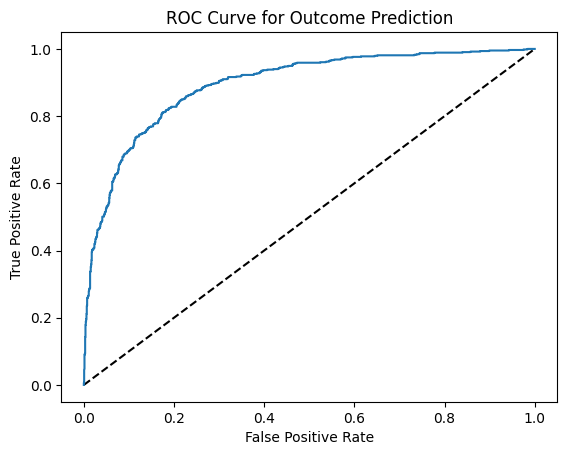

In [ ]:
plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Outcome Prediction')
plt.show()

# ROC AUC Score

In [ ]:
# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.8934412020649223


In [ ]:
# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[1235  132]
 [ 263  370]]


# Logistig regresion Hyperparameter tuning with GridSearchCV

In [ ]:
# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

In [ ]:
# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

In [ ]:
# Fit the data to the model
logreg_cv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=5, shuffle=True),
                   estimator=LogisticRegression(C=0.61, class_weight='balanced',
                                                tol=0.93),
                   param_distributions={'C': array([0.1       , 0.11836735, 0.13673469, 0.15510204, 0.17346939,
       0.19183673, 0.21020408, 0.22857143, 0.24693878, 0.26530612,
       0.28367347, 0.30204082, 0.32040816, 0.33877551, 0.35714286,
       0.3755102 , 0.39387755,...
       4.89846939e-01, 5.10253061e-01, 5.30659184e-01, 5.51065306e-01,
       5.71471429e-01, 5.91877551e-01, 6.12283673e-01, 6.32689796e-01,
       6.53095918e-01, 6.73502041e-01, 6.93908163e-01, 7.14314286e-01,
       7.34720408e-01, 7.55126531e-01, 7.75532653e-01, 7.95938776e-01,
       8.16344898e-01, 8.36751020e-01, 8.57157143e-01, 8.77563265e-01,
       8.97969388e-01, 9.18375510e-01, 9.38781633e-01, 9.59187755e-01,
       9.79593878e-01, 1.00000000e+00])})

In [ ]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 0.28578571428571425, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.3755102040816327}
Tuned Logistic Regression Best Accuracy Score: 0.8067500000000001


# Evaluating multiple models

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

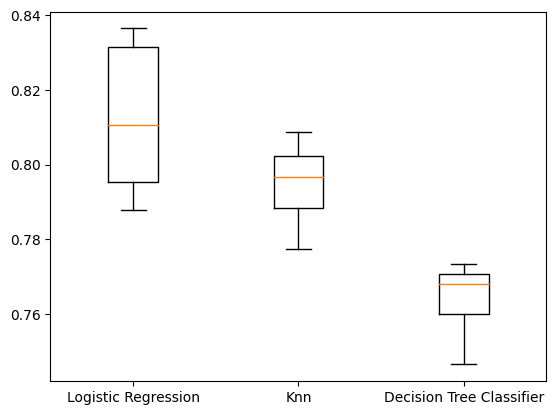

In [ ]:
models = {"Logistic Regression": LogisticRegression(), "Knn": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)

  # Perform cross-validation
  cv_scores = cross_val_score(model, X_train, y_train, cv=kf)

  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()